In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ecom_df = dd.read_csv('s3://e-commerce-explore/2019-Oct.csv', storage_options={'anon': True})
ecom_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [3]:
%timeit ecom_df = dd.read_csv('s3://e-commerce-explore/2019-Oct.csv', storage_options={'anon': True})

124 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%timeit ecom_df_pd = pd.read_csv('2019-Oct.csv')

1min 13s ± 97.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
user_items = round(ecom_df[ecom_df.event_type == 'purchase'].groupby('user_id').count().product_id.mean().compute(),2)
print(f'Average Items Purchased Per User: {user_items}')

Average Items Purchased Per User: 2.14


In [31]:
item_price = round(ecom_df[ecom_df.event_type == 'purchase'].price.mean().compute(),2)
print(f'Average Purchased Item Price: ${item_price}')

Average Purchased Item Price: $309.56


In [11]:
ecom_df[ecom_df.event_type == 'view'].groupby('category_code').count()['product_id'].nlargest(10).compute()

category_code
electronics.smartphone              10619448
electronics.clocks                   1272783
computers.notebook                   1106406
electronics.video.tv                 1055961
electronics.audio.headphone          1018542
appliances.kitchen.refrigerators      863411
appliances.kitchen.washer             831279
appliances.environment.vacuum         772029
apparel.shoes                         759646
auto.accessories.player               464272
Name: product_id, dtype: int64

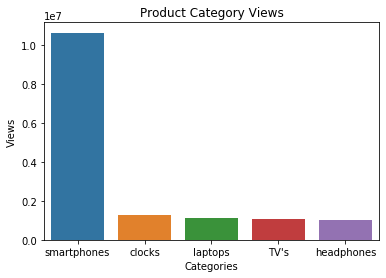

In [37]:
categories = ['smartphones', 'clocks', 'laptops', 'TV\'s', 'headphones']
views = [10619448, 1272783, 1106406, 1055961, 1018542]
sns.barplot(x = categories, y = views)
plt.title('Product Category Views')
plt.ylabel('Views')
plt.xlabel('Categories');

In [19]:
ecom_df[ecom_df.event_type == 'purchase'].groupby('category_code').count()['product_id'].nlargest(10).compute()

category_code
electronics.smartphone              338018
electronics.audio.headphone          30503
electronics.video.tv                 21565
electronics.clocks                   17906
appliances.kitchen.washer            16148
computers.notebook                   15590
appliances.environment.vacuum        12378
appliances.kitchen.refrigerators     11218
electronics.tablet                    5603
auto.accessories.player               4647
Name: product_id, dtype: int64

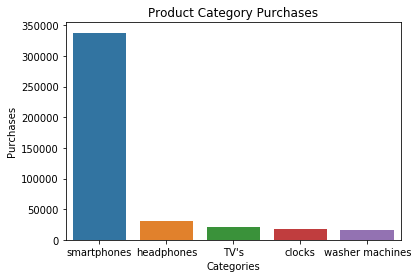

In [38]:
categories = ['smartphones', 'headphones', 'TV\'s', 'clocks', 'washer machines']
purchases = [338018, 30503, 21565, 17906, 16148]
sns.barplot(x = categories, y = purchases)
plt.title('Product Category Purchases')
plt.ylabel('Purchases')
plt.xlabel('Categories');

In [32]:
clock_price = round(ecom_df[ecom_df.category_code == 'electronics.clocks'].price.mean().compute(),2)
print(f'Average Clock Price: ${clock_price}')

Average Clock Price: $294.45


In [4]:
ecom_df[ecom_df.event_type == 'view'].groupby('brand').count()['user_id'].nlargest(10).compute()

brand
samsung    4806630
apple      3770597
xiaomi     2922650
huawei     1045572
lucente     644283
bosch       544230
lg          540131
oppo        451449
sony        439855
acer        411871
Name: user_id, dtype: int64

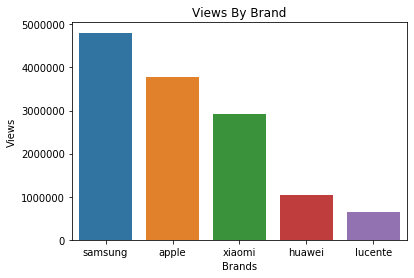

In [41]:
brands = ['samsung', 'apple', 'xiaomi', 'huawei', 'lucente']
views = [4806630, 3770597, 2922650, 1045572, 644283]
sns.barplot(x = brands, y = views)
plt.title('Views By Brand')
plt.ylabel('Views')
plt.xlabel('Brands');

In [5]:
ecom_df[ecom_df.event_type == 'purchase'].groupby('brand').count()['user_id'].nlargest(10).compute()

brand
samsung     172896
apple       142873
xiaomi       56616
huawei       23501
lucente      11578
oppo         10891
cordiant     10551
lg            8727
acer          6882
sony          6729
Name: user_id, dtype: int64

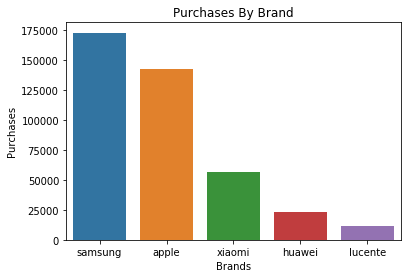

In [40]:
brands = ['samsung', 'apple', 'xiaomi', 'huawei', 'lucente']
purchases = [172896, 142873, 56616, 23501, 11578]
sns.barplot(x = brands, y = purchases)
plt.title('Purchases By Brand')
plt.ylabel('Purchases')
plt.xlabel('Brands');

In [6]:
ecom_df.event_time = dd.to_datetime(ecom_df.event_time)
ecom_df['date'] = dd.to_datetime(ecom_df.event_time.dt.date)
ecom_df['hour'] = ecom_df.event_time.dt.round('H').dt.hour
ecom_df['weekday'] = ecom_df.event_time.dt.weekday
ecom_df.weekday = ecom_df.weekday.replace(0, 'Monday')\
                                 .replace(1, 'Tuesday')\
                                 .replace(2, 'Wednesday')\
                                 .replace(3, 'Thursday')\
                                 .replace(4, 'Friday')\
                                 .replace(5, 'Saturday')\
                                 .replace(6, 'Sunday')
ecom_df.category_code = ecom_df.category_code.fillna('unknown')
ecom_df.brand = ecom_df.brand.fillna('unknown')

ecom_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,hour,weekday
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,unknown,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,0,Tuesday
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,0,Tuesday
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,unknown,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,0,Tuesday
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,0,Tuesday
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,0,Tuesday


In [9]:
ecom_df.weekday.value_counts().compute()

Tuesday      6801885
Wednesday    6652532
Thursday     6380367
Sunday       5855995
Friday       5829660
Saturday     5606796
Monday       5321529
Name: weekday, dtype: int64

In [33]:
ecom_df[ecom_df.event_type == 'purchase'].weekday.value_counts().compute()

Wednesday    119159
Tuesday      114510
Thursday     113664
Friday       103044
Sunday       100233
Saturday      96177
Monday        96062
Name: weekday, dtype: int64

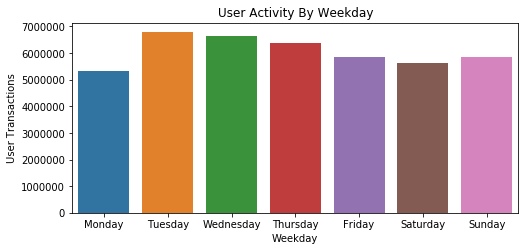

In [35]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transactions = [5321529, 6801885, 6652532, 6380367, 5829660, 5606796, 5855995]
plt.figure(figsize=(8, 3.5))
sns.barplot(x = weekdays, y = transactions)
plt.title('User Activity By Weekday')
plt.ylabel('User Transactions')
plt.xlabel('Weekday');

In [13]:
ecom_df.hour.value_counts().compute()

16    3062754
17    2947189
15    2844131
14    2516409
18    2456940
8     2391634
9     2388528
10    2313083
7     2288719
11    2243306
6     2218579
13    2217792
12    2143072
5     2023911
4     1749473
19    1728936
3     1324732
20    1003385
2      793134
21     568341
1      408786
22     339435
0      241229
23     235266
Name: hour, dtype: int64

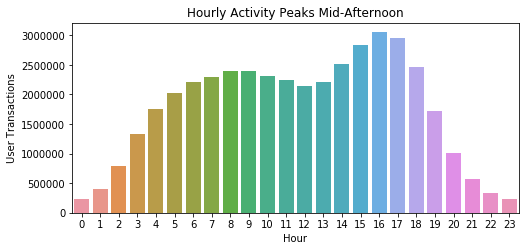

In [36]:
hourly_activity = [241229, 408786, 793134, 1324732, 1749473, 2023911, 2218579, 2288719, 2391634, 2388528, 2313083, 
                  2243306, 2143072, 2217792, 2516409, 2844131, 3062754, 2947189, 2456940, 1728936, 1003385, 568341,
                  339435, 235266]
hours = list(range(24))
plt.figure(figsize=(8, 3.5))
sns.barplot(x = hours, y = hourly_activity)
plt.title('Hourly Activity Peaks Mid-Afternoon')
plt.xlabel('Hour')
plt.ylabel('User Transactions');